In [2]:
#importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


from sklearn.model_selection import KFold,cross_val_score, RepeatedStratifiedKFold,StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier

In [4]:
#reading the datasets
df = pd.read_csv('train.csv')
df1=pd.read_csv('test.csv')
sample=pd.read_csv('sample_submission.csv')

<h1><font color ='navy blue'>DATA ANALYSIS </h1>












In [5]:
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [6]:
#changing the values of the columns to make '0'and '1' recognized as categories
df['hypertension'] = df.hypertension.astype(str)
df['heart_disease'] = df.heart_disease.astype(str)

In [7]:
df.shape

(15304, 12)

In [8]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension          object
heart_disease         object
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,15304.0,7651.500000,4418.028595,0.00,3825.75,7651.50,11477.25,15303.0
age,15304.0,41.417708,21.444673,0.08,26.00,43.00,57.00,82.0
avg_glucose_level,15304.0,89.039853,25.476102,55.22,74.90,85.12,96.98,267.6
bmi,15304.0,28.112721,6.722315,10.30,23.50,27.60,32.00,80.1
stroke,15304.0,0.041296,0.198981,0.00,0.00,0.00,0.00,1.0


In [10]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<ul>
    <li>We see that there are no missing features in the dataset so we can go ahead without any data imputation</li>
</ul>

In [11]:
df1.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

In [12]:
for col in df.columns:
    print(df[col].value_counts())
    print("-"*15)

0        1
10207    1
10195    1
10196    1
10197    1
        ..
5105     1
5106     1
5107     1
5108     1
15303    1
Name: id, Length: 15304, dtype: int64
---------------
Female    9446
Male      5857
Other        1
Name: gender, dtype: int64
---------------
57.00    353
78.00    337
53.00    311
31.00    310
45.00    309
        ... 
0.16       6
0.08       6
0.48       3
1.30       2
0.68       1
Name: age, Length: 106, dtype: int64
---------------
0    14543
1      761
Name: hypertension, dtype: int64
---------------
0    14947
1      357
Name: heart_disease, dtype: int64
---------------
Yes    10385
No      4919
Name: ever_married, dtype: int64
---------------
Private          9752
children         2038
Self-employed    1939
Govt_job         1533
Never_worked       42
Name: work_type, dtype: int64
---------------
Rural    7664
Urban    7640
Name: Residence_type, dtype: int64
---------------
93.88     33
85.84     33
77.55     32
72.49     31
73.00     31
          ..
229.92    

In [13]:

for col in df1.columns:
    print(df1[col].value_counts())
    print("-"*15)


15304    1
22110    1
22103    1
22104    1
22105    1
        ..
18705    1
18706    1
18707    1
18708    1
25507    1
Name: id, Length: 10204, dtype: int64
---------------
Female    6338
Male      3865
Other        1
Name: gender, dtype: int64
---------------
57.00    243
78.00    243
45.00    220
52.00    215
31.00    210
        ... 
0.48       2
1.40       2
1.25       1
0.33       1
1.90       1
Name: age, Length: 106, dtype: int64
---------------
0    9679
1     525
Name: hypertension, dtype: int64
---------------
0    9982
1     222
Name: heart_disease, dtype: int64
---------------
Yes    7073
No     3131
Name: ever_married, dtype: int64
---------------
Private          6573
Self-employed    1349
children         1270
Govt_job          992
Never_worked       20
Name: work_type, dtype: int64
---------------
Urban    5182
Rural    5022
Name: Residence_type, dtype: int64
---------------
93.88     27
90.42     26
83.16     23
86.06     22
91.85     22
          ..
108.52     1
112

In [14]:
y = df['stroke']
print(f'Percentage of patient had a stroke: % {round(y.value_counts(normalize=True)[1]*100,2)} --> ({y.value_counts()[1]} patient)\nPercentage of patient did not have a stroke: % {round(y.value_counts(normalize=True)[0]*100,2)} --> ({y.value_counts()[0]} patient)')

Percentage of patient had a stroke: % 4.13 --> (632 patient)
Percentage of patient did not have a stroke: % 95.87 --> (14672 patient)


<ul>
    <li>This is an imbalanced dataset with the minority class being patients having a stroke.</li>
</ul>

<h1><font color ='navy blue'>DATA VISUALISATION </h1>

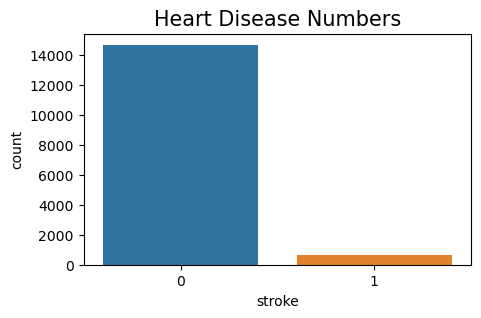

In [15]:
plt.figure(figsize=(5,3))
sns.countplot(x='stroke',data=df)
plt.title("Heart Disease Numbers", size=15)
plt.show()

<ul>
<li>Our stroke dataset is an example of a so-called imbalanced dataset.</li>
<li>There are 19 times more people who didn’t have stroke in our data than who had, and we say that the non-stroke class dominates the stroke class.</li>
<li>We can clearly see that: the stroke rate in our data is 0.041</li>
<li>Which is a strong indicator of class imbalance</li></ul>

In [16]:
#dividing the columns into categorical and numerical columns
categorical=['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']
numerical=['age','avg_glucose_level','bmi']
target=['stroke']

In [17]:
df[numerical].skew()
#finding the deviation of the categories from a standard normal distribution.

age                 -0.103579
avg_glucose_level    3.037242
bmi                  0.713051
dtype: float64

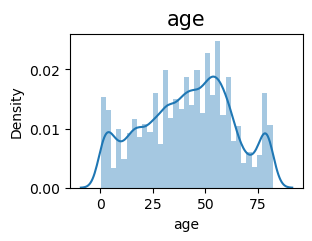

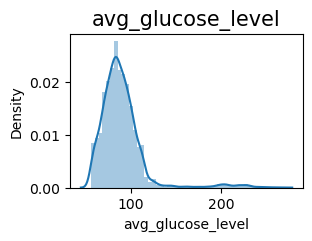

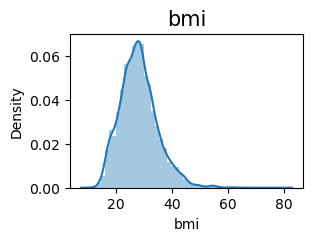

In [18]:
for i in numerical:
    plt.figure(figsize=(3,2))
    sns.distplot(df[i])
    plt.title(i, size=15)
    plt.show()
#visualising the numerical columns of the dataset


<h3>Visualising the categorical columns of the dataset</h3>

Female    61.72
Male      38.27
Other      0.01
Name: gender, dtype: float64


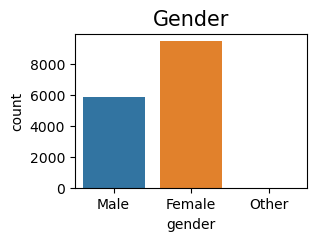

In [19]:
print (f'{round(df["gender"].value_counts(normalize=True)*100,2)}')
plt.figure(figsize=(3,2))
sns.countplot(x='gender',data=df)
plt.title("Gender", size=15)
plt.show()

0    95.03
1     4.97
Name: hypertension, dtype: float64


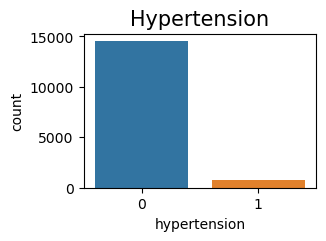

In [20]:
print (f'{round(df["hypertension"].value_counts(normalize=True)*100,2)}')
plt.figure(figsize=(3,2))
sns.countplot(x='hypertension',data=df)
plt.title("Hypertension", size=15)
plt.show()

0    97.67
1     2.33
Name: heart_disease, dtype: float64


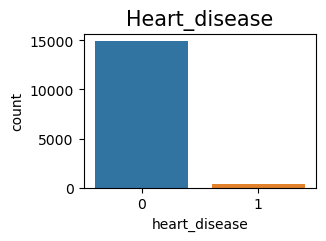

In [21]:
print (f'{round(df["heart_disease"].value_counts(normalize=True)*100,2)}')
plt.figure(figsize=(3,2))
sns.countplot(x='heart_disease',data=df)
plt.title("Heart_disease", size=15)
plt.show()

Yes    67.86
No     32.14
Name: ever_married, dtype: float64


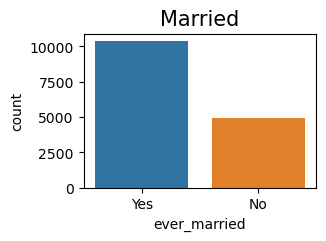

In [22]:
print (f'{round(df["ever_married"].value_counts(normalize=True)*100,2)}')
plt.figure(figsize=(3,2))
sns.countplot(x='ever_married',data=df)
plt.title("Married", size=15)
plt.show()

Private          63.72
children         13.32
Self-employed    12.67
Govt_job         10.02
Never_worked      0.27
Name: work_type, dtype: float64


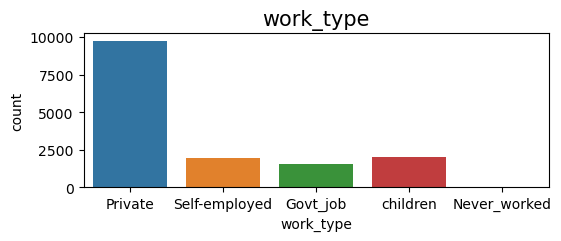

In [23]:
print (f'{round(df["work_type"].value_counts(normalize=True)*100,2)}')
plt.figure(figsize=(6,2))
sns.countplot(x='work_type',data=df)
plt.title("work_type", size=15)
plt.show()

Rural    50.08
Urban    49.92
Name: Residence_type, dtype: float64


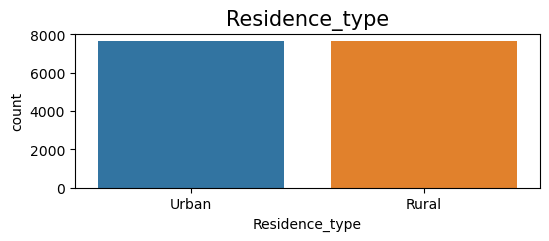

In [24]:
print (f'{round(df["Residence_type"].value_counts(normalize=True)*100,2)}')
plt.figure(figsize=(6,2))
sns.countplot(x='Residence_type',data=df)
plt.title("Residence_type", size=15)
plt.show()

never smoked       41.04
Unknown            29.69
formerly smoked    15.27
smokes             14.00
Name: smoking_status, dtype: float64


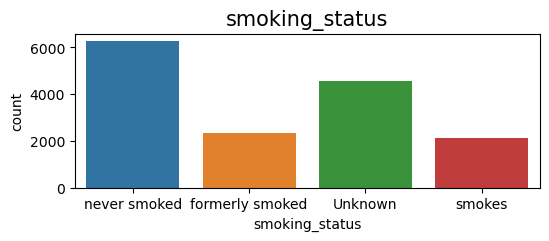

In [25]:
print (f'{round(df["smoking_status"].value_counts(normalize=True)*100,2)}')
plt.figure(figsize=(6,2))
sns.countplot(x='smoking_status',data=df)
plt.title("smoking_status", size=15)
plt.show()

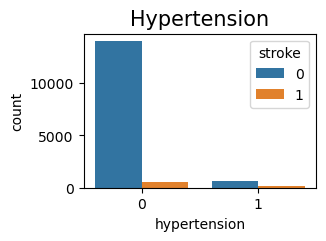

A person with hypertension has a probability of 16.82 % get a stroke

A person without hypertension has a probability of  3.47 % get a stroke


In [26]:
plt.figure(figsize=(3,2))
sns.countplot(x='hypertension',hue='stroke',data=df)
plt.title("Hypertension", size=15)
plt.show()
print (f'A person with hypertension has a probability of {round(df[df["hypertension"]=="1"]["stroke"].mean()*100,2)} % get a stroke')
print()
print (f'A person without hypertension has a probability of  {round(df[df["hypertension"]=="0"]["stroke"].mean()*100,2)} % get a stroke')

<ul>
  <li>Hypertension makes the people 4 times more prone to a stroke</li>
</ul>




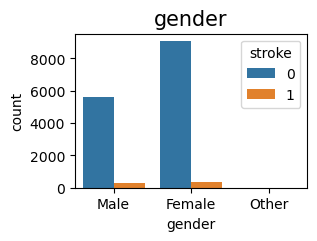

A female person has a probability of 3.9 % get a stroke

A male person has a probability of 4.51 % get a stroke

A person from  the other category of gender has a probability of 0.0 % get a stroke


In [27]:
plt.figure(figsize=(3,2))
sns.countplot(x='gender',hue='stroke',data=df)
plt.title("gender", size=15)
plt.show()
print (f'A female person has a probability of {round(df[df["gender"]=="Female"]["stroke"].mean()*100,2)} % get a stroke')
print()
print (f'A male person has a probability of {round(df[df["gender"]=="Male"]["stroke"].mean()*100,2)} % get a stroke')
print()
print (f'A person from  the other category of gender has a probability of {round(df[df["gender"]=="Other"]["stroke"].mean()*100,2)} % get a stroke')

<ul>
    <li>Male more likely to get a stroke</li>
</ul>

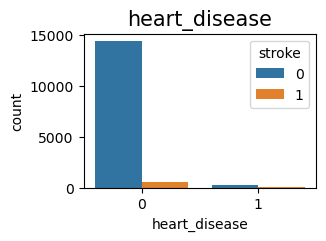

A person with heart disease has a probability of 18.49 % get a stroke

A person without heart disease has a probability of 3.79 % get a stroke


In [28]:
plt.figure(figsize=(3,2))
sns.countplot(x='heart_disease',hue='stroke',data=df)
plt.title("heart_disease", size=15)
plt.show()
print (f'A person with heart disease has a probability of {round(df[df["heart_disease"]=="1"]["stroke"].mean()*100,2)} % get a stroke')
print()
print (f'A person without heart disease has a probability of {round(df[df["heart_disease"]=="0"]["stroke"].mean()*100,2)} % get a stroke')

<ul>
    <li>almost 6 times more vulnerable</li>
</ul>

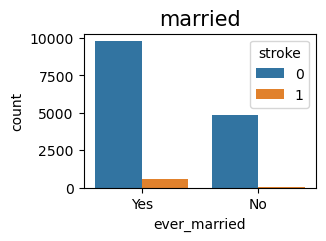

A person married (or married before) has a probability of 5.69 % get a stroke

A person never married has a probability of 0.83 % get a stroke


In [29]:
plt.figure(figsize=(3,2))
sns.countplot(x='ever_married',hue='stroke',data=df)
plt.title("married", size=15)
plt.show()
print (f'A person married (or married before) has a probability of {round(df[df["ever_married"]=="Yes"]["stroke"].mean()*100,2)} % get a stroke')
print()
print (f'A person never married has a probability of {round(df[df["ever_married"]=="No"]["stroke"].mean()*100,2)} % get a stroke')

<ul>
    <li>almost 7 times more vulnerable</li>
</ul>

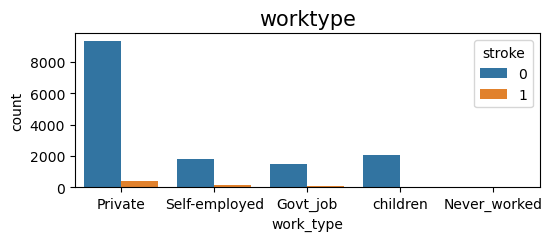

A person with private work type has a probability of 4.14 % get a stroke

Self-employed person has a probability of 8.15 % get a stroke

A person with a goverment job has a probability of 4.5 % get a stroke

A child has a probability of 0.05 % get a stroke

A person never worked has a probability of 0.0 % get a stroke


In [30]:
plt.figure(figsize=(6,2))
sns.countplot(x='work_type',hue='stroke',data=df)
plt.title("worktype", size=15)
plt.show()
print (f'A person with private work type has a probability of {round(df[df["work_type"]=="Private"]["stroke"].mean()*100,2)} % get a stroke')
print()
print (f'Self-employed person has a probability of {round(df[df["work_type"]=="Self-employed"]["stroke"].mean()*100,2)} % get a stroke')
print()
print (f'A person with a goverment job has a probability of {round(df[df["work_type"]=="Govt_job"]["stroke"].mean()*100,2)} % get a stroke')
print()
print (f'A child has a probability of {round(df[df["work_type"]=="children"]["stroke"].mean()*100,2)} % get a stroke')
print()
print (f'A person never worked has a probability of {round(df[df["work_type"]=="Never_worked"]["stroke"].mean()*100,2)} % get a stroke')

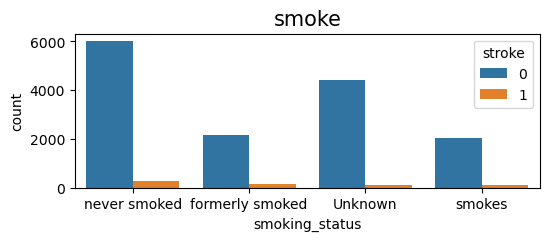

A formerly smoked person has a probability of 6.8 % get a stroke

A person never smoked has a probability of 4.09 % get a stroke

A person smokes has a probability of 5.04 % get a stroke

A person whom smoking history is not known,has a probability of 2.38 % get a stroke



In [31]:
plt.figure(figsize=(6,2))
sns.countplot(x='smoking_status',hue='stroke',data=df)
plt.title("smoke", size=15)
plt.show()
print (f'A formerly smoked person has a probability of {round(df[df["smoking_status"]=="formerly smoked"]["stroke"].mean()*100,2)} % get a stroke')
print()
print (f'A person never smoked has a probability of {round(df[df["smoking_status"]=="never smoked"]["stroke"].mean()*100,2)} % get a stroke')
print()
print (f'A person smokes has a probability of {round(df[df["smoking_status"]=="smokes"]["stroke"].mean()*100,2)} % get a stroke')
print()
print (f'A person whom smoking history is not known,has a probability of {round(df[df["smoking_status"]=="Unknown"]["stroke"].mean()*100,2)} % get a stroke')
print()

In [32]:
from sklearn.metrics import mutual_info_score
#to find the effect of the categorical values on the target value
def cat_mut_inf(series):
    return mutual_info_score(series, df['stroke']) 

df_cat = df[categorical].apply(cat_mut_inf) 
df_cat = df_cat.sort_values(ascending=False).to_frame(name='mutual_info_score') 
df_cat

,mutual_info_score
ever_married,8.363274e-03
work_type,7.424349e-03
hypertension,6.431808e-03
heart_disease,3.528292e-03
smoking_status,2.651211e-03
gender,1.132182e-04
Residence_type,5.488456e-08


<ul>
    <li>The categorical values have a very negligible effect on the target value.</li>
    <li>We can first test the model with and without the categorical values</li>
    <li>Third case we can test by dropping the bottom 3 columns</li>
</ul>

<Axes: >

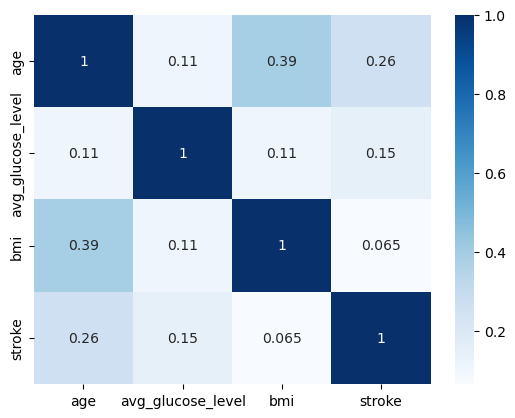

In [33]:
num_corr=df[numerical+['stroke']].corr()
#finding the correlation of the target variable with the numerical categories
sns.heatmap(num_corr,annot=True,cmap='Blues')

<ul>
    <li>as age increases the stroke probability also increases</li>
    <li>Very low correlation so we can asuume the variables are independent of each other and go ahead with our classification.</li>
</ul>

In [34]:
df.groupby('stroke')[numerical].mean()

,age,avg_glucose_level,bmi
stroke,,,
0,40.254676,88.250602,28.021489
1,68.417722,107.362468,30.230696


<Axes: xlabel='age', ylabel='bmi'>

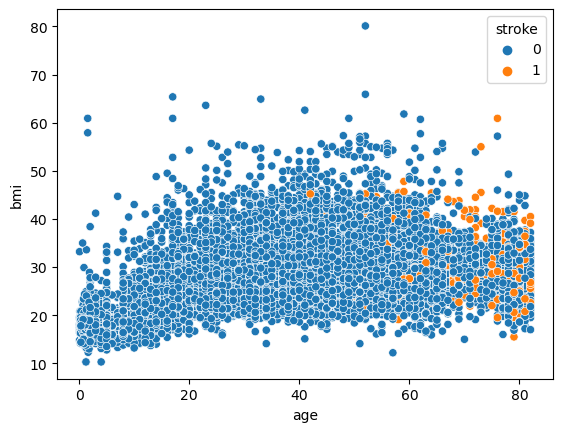

In [35]:
sns.scatterplot(x='age',y='bmi',hue='stroke',data=df)

<Axes: xlabel='age', ylabel='avg_glucose_level'>

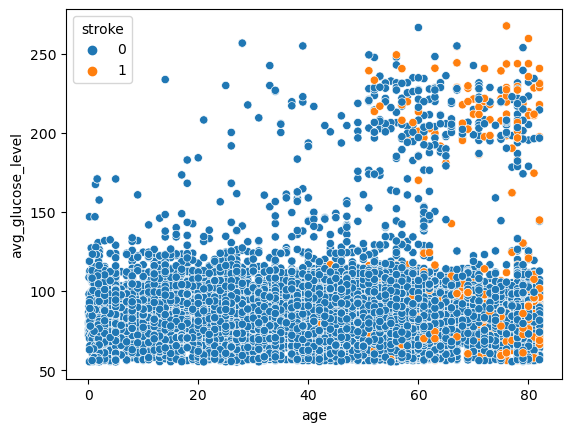

In [36]:
sns.scatterplot(x='age',y='avg_glucose_level',hue='stroke',data=df)

<Axes: xlabel='bmi', ylabel='avg_glucose_level'>

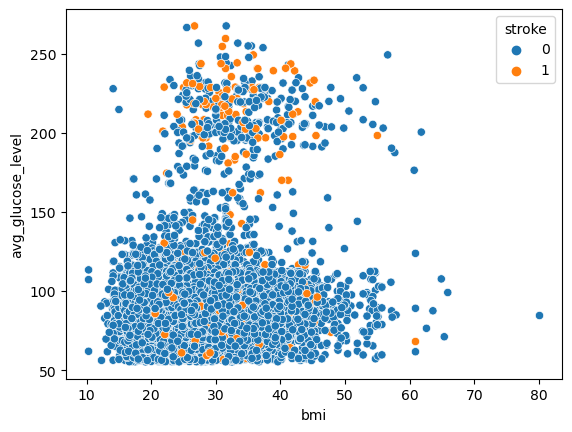

In [37]:
sns.scatterplot(x='bmi',y='avg_glucose_level',hue='stroke',data=df)

<ul>
    <li>Age and target have a weak positive relationship of about 0.25</li>
    <li><strong>A person with hypertension has a probability of 16.82 % get a stroke and is 4 times more vulnerable.</strong></li>
    <li><strong>A person married (or married before) has a probability of 5.69 % get a stroke and is 8 times more vulnerable.</strong></li>
    <li><strong>A person with heart disease has a probability of 18.49 % get a stroke and is 5 times more vulnerable.</strong></li>    <li>Male has a slightly higher prob(4.5>3.9) of getting a stroke but it is almost negligile.</li>>    <li>A person who smokes has a higher probability compared to someone who doesnt.</li>
    <li>place of living doesnt really matter.</li>

</ul>

<h1><font color ='navy blue'>MODEL SELECTION</h1>

In [38]:
#splitting the dataset into categories and target variable
X=df.drop('stroke',axis=1)
Xt=df1 #the test dataframe
y=df['stroke']

In [39]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: stroke, dtype: int64

In [40]:
Xt.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,15304,Female,57.0,0,0,Yes,Private,Rural,82.54,33.4,Unknown
1,15305,Male,70.0,1,0,Yes,Private,Urban,72.06,28.5,Unknown
2,15306,Female,5.0,0,0,No,children,Urban,103.72,19.5,Unknown
3,15307,Female,56.0,0,0,Yes,Govt_job,Urban,69.24,41.4,smokes
4,15308,Male,32.0,0,0,Yes,Private,Rural,111.15,30.1,smokes


In [41]:
#Using get_dummies to encode the categorical columns of the dataset
X=pd.get_dummies(X,columns=categorical)
Xt=pd.get_dummies(Xt,columns=categorical)

In [42]:
columns=[numerical+categorical]

In [43]:
#Using powertransformer for data preprocessing
power = PowerTransformer(method='yeo-johnson', standardize=True)
X_transform = power.fit_transform(X)
X_transform

array([[-2.19287219, -0.58484984, -0.27197861, ..., -0.42453119,
         1.19856359, -0.40352146],
       [-2.19027092, -0.34839724, -0.34356089, ...,  2.35553954,
        -0.83433203, -0.40352146],
       [-2.1880414 ,  0.0661151 ,  0.87801473, ..., -0.42453119,
        -0.83433203, -0.40352146],
       ...,
       [ 1.55353995,  1.50306219,  0.20328661, ..., -0.42453119,
         1.19856359, -0.40352146],
       [ 1.55371332,  0.24651676,  0.80739166, ..., -0.42453119,
        -0.83433203, -0.40352146],
       [ 1.5538867 , -1.28091409,  0.0641911 , ..., -0.42453119,
         1.19856359, -0.40352146]])

Using Logistic Regression to begin the classification.

In [44]:
AUC = {}

In [45]:
log_reg=LogisticRegression(solver='liblinear')
log_reg.fit(X,y)
yt_1=log_reg.predict_proba(Xt) #predicting the probability 
yt_1.shape

(10204, 2)

In [46]:
target_var_index = df1["id"].values.tolist() #Finding the index of the target variables

In [47]:
#defing a function for converting the numpy 2-d array to a dataframe matching the sample submission.csv format
def srstofrm(k):
    ytt_b1=k[:,1]
    ytt_b1=pd.Series(ytt_b1)
    ysub_b1=ytt_b1.to_frame()
    ysub_b1['id']=target_var_index
    ysub_b1.rename(columns={0: "stroke"},inplace=True)
    ysub_b1=ysub_b1.iloc[:,[1,0]]
    return ysub_b1
    

In [48]:
ysub_1= srstofrm(yt_1)

In [49]:
ysub_1.shape

(10204, 2)

In [50]:
sample.shape
#checking if the shape of the samplesubmission dataframe and our dataframe matches

(10204, 2)

In [51]:
ysub_1.head()

,id,stroke
0,15304,0.032560
1,15305,0.133009
2,15306,0.000713
3,15307,0.035113
4,15308,0.007487


In [52]:
#ysub_1.to_csv('logreg1.csv',index=False)
#auc:0.87184(after submission)AUC

In [53]:
AUC['LogRegSimple']=[0.87184]

In [54]:
#Using GridSearchCV to find the ideal parameters

reg_model= LogisticRegression()

params = {}
params['C']=[0.1,1,10,100]
params['penalty']=['l1','l2',None]
params['solver']=['lbfgs','liblinear','saga']
cv = KFold(n_splits=5, shuffle=True, random_state=42)


In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
grid = GridSearchCV(reg_model,param_grid = params, cv=cv, scoring='roc_auc', n_jobs=-1)
grid.fit(X,y)
grid.best_params_

/usr/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimiz

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

In [57]:
yt_2=grid.predict_proba(Xt)
ysub_2= srstofrm(yt_2)
ysub_2.head()
#ysub_2.to_csv('logreg2grid.csv',index=False)
#auc:0.86925 

,id,stroke
0,15304,0.033853
1,15305,0.139874
2,15306,0.000324
3,15307,0.044673
4,15308,0.006304


In [58]:
AUC['LogRegSimpleGrid']=[0.86925]

We have tried logistic regression on the model with and without Gridsearch. Now we will try using svm to predict probability.

In [59]:
from sklearn.svm import SVC
svc=SVC(probability=True,kernel='rbf') 

In [60]:
svc.fit(X,y)
yt_3=svc.predict_proba(Xt)
ysub_3= srstofrm(yt_3)
ysub_3.head()
#ysub_3.to_csv('SVC1.csv',index=False)
#auc:0.55635 (Pretty low value)

,id,stroke
0,15304,0.042291
1,15305,0.042294
2,15306,0.042278
3,15307,0.042288
4,15308,0.042288


In [61]:
AUC['SVMSimple']=[0.55635]

In [62]:
ld = LinearDiscriminantAnalysis() #Using LinearDiscriminantAnalysis to predict the probability

In [63]:
ld.fit(X,y)
yt_4=ld.predict_proba(Xt)
ysub_4= srstofrm(yt_4)
ysub_4.head()
#ysub_4.to_csv('ld1.csv',index=False)
#auc:0.88156 (Highest value so far)

,id,stroke
0,15304,0.019974
1,15305,0.269525
2,15306,0.003489
3,15307,0.010378
4,15308,0.003578


In [64]:
AUC['LDASimple']=[0.88156]

In [65]:
#using GridsearchCV to find the ideal parameters for ld
params1 = {}
params1['shrinkage']=['auto',0.5,0.1,0.25,0.01,0.00000000000000000000000000000000000000000000000000000000000000000000000001,None]
params1['solver']=['svd', 'lsqr', 'eigen']
cv = KFold(n_splits=5, shuffle=True, random_state=42)
gridld1 = GridSearchCV(ld,param_grid = params1, cv=cv, scoring='roc_auc', n_jobs=-1)
gridld1.fit(X,y)
gridld1.best_params_

{'shrinkage': 1e-74, 'solver': 'lsqr'}

In [66]:
yt_5=gridld1.predict_proba(Xt)
ysub_5= srstofrm(yt_5)
ysub_5.head()
#ysub_5.to_csv('ldgrid.csv',index=False)
#auc:0.88156

,id,stroke
0,15304,0.019972
1,15305,0.269580
2,15306,0.003488
3,15307,0.010376
4,15308,0.003576


In [67]:
AUC['LDASimpleGrid']=[0.88156]

We have tried using 3 different models on the dataframe with and without gridsearch.LDA had the best performance among the 3 of them with SVM having a lowest performance.Now we shall try oversampling of the data to see if we can get any better results.

In [68]:
oversample = SMOTE()
Xs,ys=oversample.fit_resample(X, y)
ld.fit(Xs,ys)
yt_6=ld.predict_proba(Xt)
ysub_6= srstofrm(yt_6)
ysub_6.head()
#ysub_6.to_csv('ldasmote.csv',index=False)
#auc 0.85327

,id,stroke
0,15304,0.008248
1,15305,0.042336
2,15306,0.000136
3,15307,0.001438
4,15308,0.000384


In [69]:
AUC['LDASmote']=[0.85327]

In [70]:
svc.fit(Xs,ys)
yt_7=svc.predict_proba(Xt)
yt_7
ysub_7= srstofrm(yt_7)
ysub_7.head()
#ysub_7.to_csv('svmos.csv',index=False)
#auc 0.83327

,id,stroke
0,15304,0.399748
1,15305,0.404462
2,15306,0.374646
3,15307,0.395768
4,15308,0.392670


In [71]:
AUC['SVMSmote']=[0.83327]

In [72]:
#Using Gridsearch on the oversampled dataset
params1 = {}
params1['shrinkage']=['auto',0.5,0.1,0.25,0.01,0.00000000000000000000000000000000000000000000000000000000000000000000000001,None]
params1['solver']=['svd', 'lsqr', 'eigen']
cv = KFold(n_splits=5, shuffle=True, random_state=42)
gridld1 = GridSearchCV(ld,param_grid = params1, cv=cv, scoring='roc_auc', n_jobs=-1)
gridld1.fit(Xs,ys)
gridld1.best_params_

{'shrinkage': 1e-74, 'solver': 'lsqr'}

In [73]:
yt_LSG=gridld1.predict_proba(Xt)
ysub_LSG= srstofrm(yt_LSG)
ysub_LSG.head()
#ysub_LSG.to_csv('LSG.csv',index=False)
#auc 0.83622

,id,stroke
0,15304,0.008245
1,15305,0.042328
2,15306,0.000136
3,15307,0.001437
4,15308,0.000384


In [74]:
AUC['LDASmoteGrid']=[0.83622]

In [75]:
from imblearn.under_sampling import NearMiss #undersampling

In [76]:
undersample = NearMiss(version=1, n_neighbors=3)
Xss, yss = undersample.fit_resample(X, y)

In [77]:
ld.fit(Xss,yss)
yt_8=ld.predict_proba(Xt)

In [78]:
yt_8

array([[0.64899976, 0.35100024],
       [0.47509251, 0.52490749],
       [0.0750501 , 0.9249499 ],
       ...,
       [0.0763187 , 0.9236813 ],
       [0.88392029, 0.11607971],
       [0.11892143, 0.88107857]])

In [79]:
ysub_8= srstofrm(yt_8)
ysub_8.head()
#ysub_8.to_csv('ldus.csv',index=False)

,id,stroke
0,15304,0.351000
1,15305,0.524907
2,15306,0.924950
3,15307,0.591834
4,15308,0.273188


In [80]:
AUC['LDAUnder']=[0.75603]

We have tried all the 3 models on the oversampled data and lda on the undersampled one. We see a significant boost in the performance of the svc model with oversampling.Now we shall use xgboost on the dataset.

In [81]:
import xgboost as xgb

In [82]:
xgb_model_mpg = xgb.XGBClassifier(max_depth= 3, n_estimators=100)
xgb_model_mpg.fit(X,y)
yt_9 = xgb_model_mpg.predict_proba(Xt)
ysub_9= srstofrm(yt_9)
ysub_9.head()
#ysub_9.to_csv('xgb1.csv',index=False)
#auc 0.84903

,id,stroke
0,15304,0.014730
1,15305,0.586739
2,15306,0.000071
3,15307,0.042238
4,15308,0.000876


In [83]:
AUC['XGBSimple']=[0.84903]

In [84]:
#Trying it on the oversampled one
xgb_model_mpg1 = xgb.XGBClassifier(max_depth= 10, n_estimators=100)
xgb_model_mpg1.fit(Xs,ys)
yt_10 = xgb_model_mpg.predict_proba(Xt)
ysub_10= srstofrm(yt_10)
ysub_10.head()
#ysub_10.to_csv('xgb2.csv',index=False)
#auc 0.84903

,id,stroke
0,15304,0.014730
1,15305,0.586739
2,15306,0.000071
3,15307,0.042238
4,15308,0.000876


In [85]:
AUC['XGBSmote']=[0.84903]

We have tried various different models on the dataset.Time to see if adding weights makes any difference.

In [88]:
lisp=list(df['stroke'].unique())

In [89]:
unique_classes = lisp
unique_classes #finding out the unique classes


[0, 1]

In [90]:
#Finding out the weights of the classes
out_dict = {}
out_dict[0] = df.shape[0]/((df.loc[df['stroke'] == 0].shape[0]) *len(unique_classes))
out_dict[1] = df.shape[0]/((df.loc[df['stroke'] == 1].shape[0]) *len(unique_classes))                        
out_dict                             

{0: 0.5215376226826608, 1: 12.10759493670886}

In [91]:
clf = LogisticRegression(class_weight='balanced').fit(X, y)

In [92]:
Y_Test_Pred = clf.predict_proba(Xt)

In [93]:
weights1_df=srstofrm(Y_Test_Pred)

In [94]:
weights1_df.head()
#weights1_df.to_csv('weights1.csv',index=False)

,id,stroke
0,15304,0.283392
1,15305,0.883337
2,15306,0.009712
3,15307,0.404520
4,15308,0.163425


In [95]:
AUC['LogRegWeight']=[0.84903]

In [96]:
#Using gridsearch for best parameters
weights = np.linspace(0.05, 0.95, 20)
gsc = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    },
    scoring='roc_auc',
    cv=cv
)

grid_result = gsc.fit(X, y)
print("Best parameters : %s" % grid_result.best_params_)


Best parameters : {'class_weight': {0: 0.05, 1: 0.95}}


In [97]:
clfw3 = LogisticRegression(**grid_result.best_params_).fit(X, y)
Y_Test_Predw3 = clfw3.predict_proba(Xt)
weights2_df=srstofrm(Y_Test_Predw3)
weights2_df.head()
#weights2_df.to_csv('weights2.csv',index=False)

,id,stroke
0,15304,0.283892
1,15305,0.834866
2,15306,0.004857
3,15307,0.401199
4,15308,0.083977


In [98]:
AUC['LogRegWeightGrid']=[0.86115]

In [99]:
#using the grid on oversampled dataset
weights = np.linspace(0.05, 0.95, 20)
gsc = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    },
    scoring='roc_auc',
    cv=5
)

grid_result = gsc.fit(Xs, ys)
print("Best parameters : %s" % grid_result.best_params_)

Best parameters : {'class_weight': {0: 0.8078947368421052, 1: 0.19210526315789478}}


In [100]:
clfw3 = LogisticRegression(**grid_result.best_params_).fit(X, y)
Y_Test_Predw3 = clfw3.predict_proba(Xt)


In [101]:
weights3_df=srstofrm(Y_Test_Predw3)
weights3_df.head()
#weights3_df.to_csv('weights3.csv',index=False)

,id,stroke
0,15304,0.001619
1,15305,0.028848
2,15306,0.000760
3,15307,0.000677
4,15308,0.002617


In [102]:
AUC['LogRegWeightSmoteGrid']=[0.86058]

In [104]:
AUC_df = pd.DataFrame(AUC)
AUC_df

,LogRegSimple,LogRegSimpleGrid,SVMSimple,LDASimple,LDASimpleGrid,LDASmote,SVMSmote,LDASmoteGrid,LDAUnder,XGBSimple,XGBSmote,LogRegWeight,LogRegWeightGrid,LogRegWeightSmoteGrid
0,0.87184,0.86925,0.55635,0.88156,0.88156,0.85327,0.83327,0.83622,0.75603,0.84903,0.84903,0.84903,0.86115,0.86058


We have tried various ways for training the model however we find that the LDA model was the best model(0.88156) we could use to get the highest possible value of AUC on the dataset.

****************